# The prediction task is to determine whether a person makes over $50K a year.

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

# Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

          1.A single cell estimate of the population 16+ for each state.

          2.Controls for Hispanic Origin by age and sex.

          3.Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

In [1]:
#Its a classification problem that we solve by using multiple algorithm we have categorical and numerical data combined 
#the income is our target variable

<a class="anchor" id="0.1"></a>
# **Table of Contents**

1.	[Introduction to Naive Bayes algorithm](#1)
2.	[Naive Bayes algorithm intuition](#2)
3.	[Types of Naive Bayes algorithm](#3)
4.	[Applications of Naive Bayes algorithm](#4)
5.	[Import libraries](#5)
6.	[Import dataset](#6)
7.	[Exploratory data analysis](#7)
8.	[Declare feature vector and target variable](#8)
9.	[Split data into separate training and test set](#9)
10.	[Feature engineering](#10)
11.	[Feature scaling](#11)
12.	[Model training](#12)
13.	[Predict the results](#13)
14.	[Check accuracy score](#14)
15.	[Confusion matrix](#15)
16.	[Classification metrices](#16)
17.	[Calculate class probabilities](#17)
18.	[ROC - AUC](#18)
19.	[k-Fold Cross Validation](#19)

# **1. Introduction to Naive Bayes algorithm** <a class="anchor" id="1"></a>

[Table of Contents](#0.1)


In machine learning, Naïve Bayes classification is a straightforward and powerful algorithm for the classification task. Naïve Bayes classification is based on applying Bayes’ theorem with strong independence assumption between the features.  Naïve Bayes classification produces good results when we use it for textual data analysis such as Natural Language Processing.


Naïve Bayes models are also known as `simple Bayes` or `independent Bayes`. All these names refer to the application of Bayes’ theorem in the classifier’s decision rule. Naïve Bayes classifier applies the Bayes’ theorem in practice. This classifier brings the power of Bayes’ theorem to machine learning.


# **2. Naive Bayes algorithm intuition** <a class="anchor" id="2"></a>

[Table of Contents](#0.1)


Naïve Bayes Classifier uses the Bayes’ theorem to predict membership probabilities for each class such as the probability that given record or data point belongs to a particular class. The class with the highest probability is considered as the most likely class. This is also known as the **Maximum A Posteriori (MAP)**. 

The **MAP for a hypothesis with 2 events A and B is**

**MAP (A)**

= max (P (A | B))

= max (P (B | A) * P (A))/P (B)

= max (P (B | A) * P (A))


Here, P (B) is evidence probability. It is used to normalize the result. It remains the same, So, removing it would not affect the result.


Naïve Bayes Classifier assumes that all the features are unrelated to each other. Presence or absence of a feature does not influence the presence or absence of any other feature. 


In real world datasets, we test a hypothesis given multiple evidence on features. So, the calculations become quite complicated. To simplify the work, the feature independence approach is used to uncouple multiple evidence and treat each as an independent one.


# **3. Types of Naive Bayes algorithm** <a class="anchor" id="3"></a>

[Table of Contents](#0.1)


There are 3 types of Naïve Bayes algorithm. The 3 types are listed below:-

  1. Gaussian Naïve Bayes

  2. Multinomial Naïve Bayes

  3. Bernoulli Naïve Bayes

These 3 types of algorithm are explained below.


## **Gaussian Naïve Bayes algorithm**


When we have continuous attribute values, we made an assumption that the values associated with each class are distributed according to Gaussian or Normal distribution. For example, suppose the training data contains a continuous attribute x. We first segment the data by the class, and then compute the mean and variance of x in each class. Let µi be the mean of the values and let σi be the variance of the values associated with the ith class. Suppose we have some observation value xi . Then, the probability distribution of xi given a class can be computed by the following equation –


![Gaussian Naive Bayes algorithm](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQEWCcq1XtC1Yw20KWSHn2axYa7eY-a0T1TGtdVn5PvOpv9wW3FeA&s)

## **Multinomial Naïve Bayes algorithm**

With a Multinomial Naïve Bayes model, samples (feature vectors) represent the frequencies with which certain events have been generated by a multinomial (p1, . . . ,pn) where pi is the probability that event i occurs. Multinomial Naïve Bayes algorithm is preferred to use on data that is multinomially distributed. It is one of the standard algorithms which is used in text categorization classification.

## **Bernoulli Naïve Bayes algorithm**

In the multivariate Bernoulli event model, features are independent boolean variables (binary variables) describing inputs. Just like the multinomial model, this model is also popular for document classification tasks where binary term occurrence features are used rather than term frequencies.

# **4. Applications of Naive Bayes algorithm** <a class="anchor" id="4"></a>

[Table of Contents](#0.1)



Naïve Bayes is one of the most straightforward and fast classification algorithm. It is very well suited for large volume of data. It is successfully used in various applications such as :

1. Spam filtering
2. Text classification
3. Sentiment analysis
4. Recommender systems

It uses Bayes theorem of probability for prediction of unknown class.


# **5. Import libraries** <a class="anchor" id="5"></a>

[Table of Contents](#0.1)

In [2]:
#importing all dependencies
#and setting the working directory
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt# for data visualization purposes
import numpy as np# linear algebra
import seaborn as sns# for statistical data visualization

import os
os.chdir(r"C:\Users\sid\Downloads\adults-[naivebayes]dataarchive")

In [3]:
import warnings

warnings.filterwarnings('ignore')

# **6. Import dataset** <a class = "anchor" id="6"></a>

In [4]:
#reading the data
df = pd.read_csv('adult.csv', header=None, sep=',\s')

# 7.Exploratory Data Analysis

In [5]:
#top most values
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Rename column names

In [6]:
#changing the column names for better understanding
col_name = ['age' , 'workclass' , 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
            'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country','income' ]
df.columns = col_name

In [7]:
#total columns in our data set
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [8]:
#we have 32561 examples or instances 
#and 15 variables or attributes including the target variable 
df.shape

(32561, 15)

In [9]:
#describe the data mean, min, max and std etc...
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### View summary of dataset

In [10]:
#info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
#is there any missing value
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

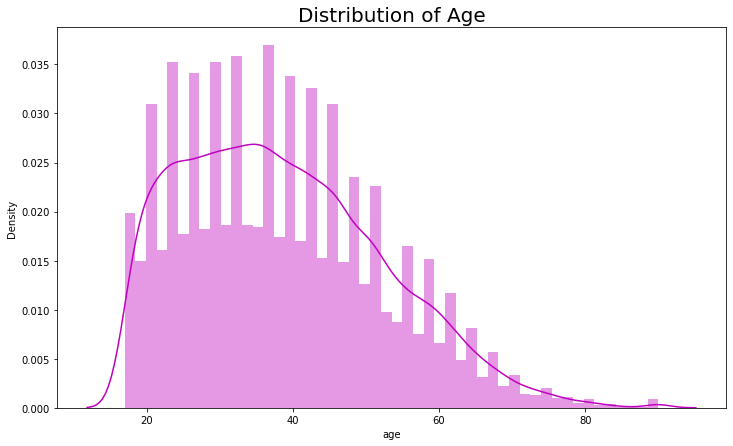

In [12]:
plt.rcParams['figure.figsize'] = (12, 7)
plt.style.use('tableau-colorblind10')
sns.distplot(df['age'], color='m')
plt.title("Distribution of Age", fontsize=20)
plt.show()

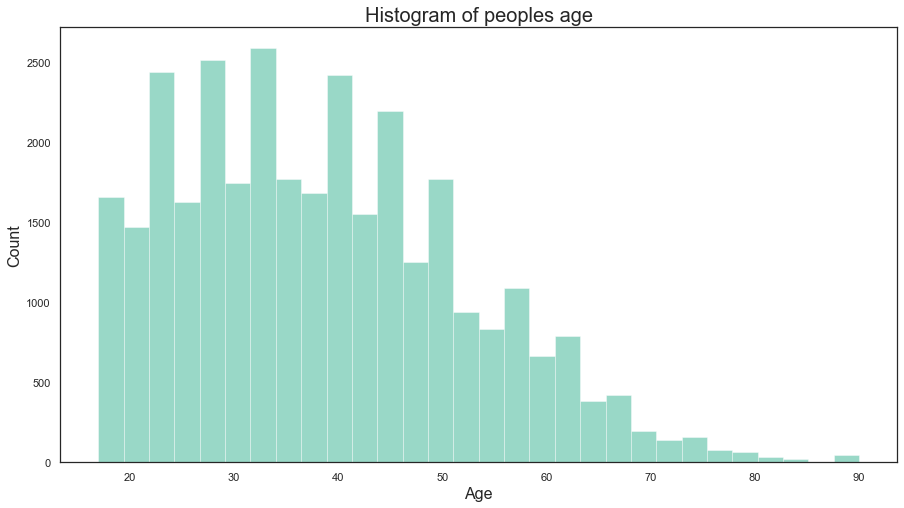

In [13]:
sns.set(style='white', palette='colorblind', color_codes=True)
x = df['age']
plt.figure(figsize=(15, 8))
ax = sns.distplot(x , bins=30, kde=False, color='g')
ax.set_xlabel(xlabel = 'Age', fontsize=16)
ax.set_ylabel(ylabel = 'Count', fontsize=16)
ax.set_title(label = "Histogram of peoples age" , fontsize=20)
plt.show()

    1.Peoples Age is distributed from 20 years to 90 years..
    2.Most of people are segregated in between 20 between 50..
    3.With increasing age there are not many people very few people are from 80 to 90 years..
    4.Its not noramlly distributed. right skewed..

In [14]:
#total counts of different workclass
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [15]:
#unique classes of workclass
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [16]:
#replacing the missing value with np.nan
df['workclass'].replace('?', np.NAN, inplace=True)

In [17]:
#so ? got replaced by nan values
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', nan, 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [18]:
#total 9 unique working class
len(df['workclass'].unique())

9

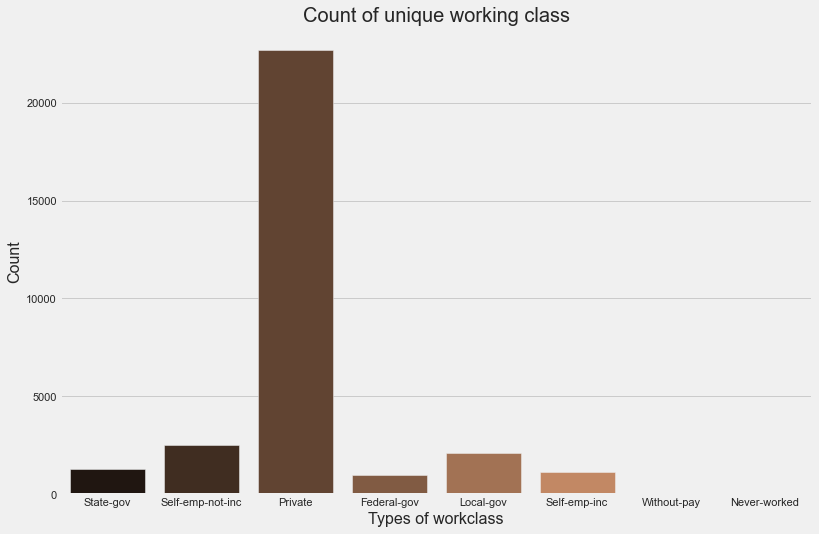

In [19]:
#total number of people of each working class...
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 8))
ax=sns.countplot(df['workclass'], data=df,  palette = 'copper')
ax.set_title(label = 'Count of unique working class', 
             fontsize = 20)
ax.set_xlabel(xlabel = 'Types of workclass', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

    1.workclass have 9 unique categories..
    2.workclass have missing values so we replace it by np.nan or we can take the most frequent one and replace it with..
    3.Private working class have most counts..
    4.never-worked is min and Private is max in work-class..

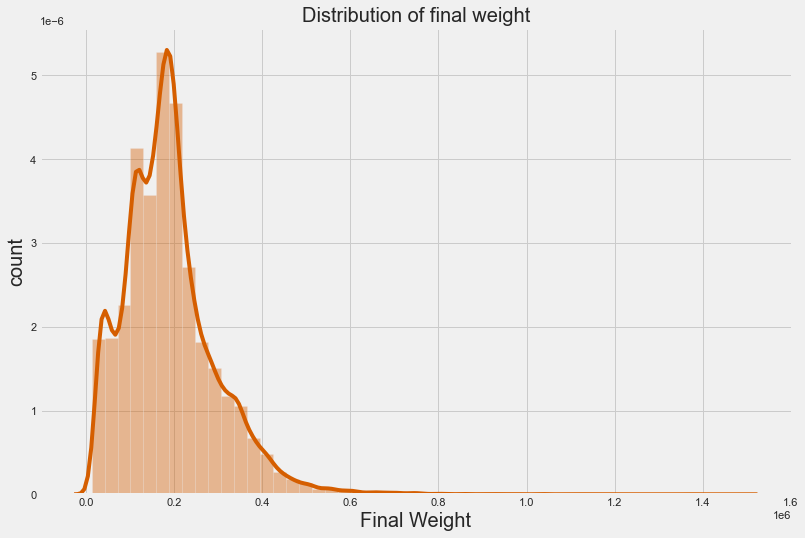

In [20]:
plt.style.use('fivethirtyeight')
#sns.set(style='whitegrid')
plt.figure(figsize=(12, 8))
ax= sns.distplot(df['fnlwgt'], color='r')
plt.title("Distribution of final weight", fontsize=20)
ax.set_xlabel(xlabel = 'Final Weight', fontsize=20)
ax.set_ylabel(ylabel = 'count', fontsize=20)
plt.show()

In [21]:
df['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [22]:
len(df['education'].unique())

16

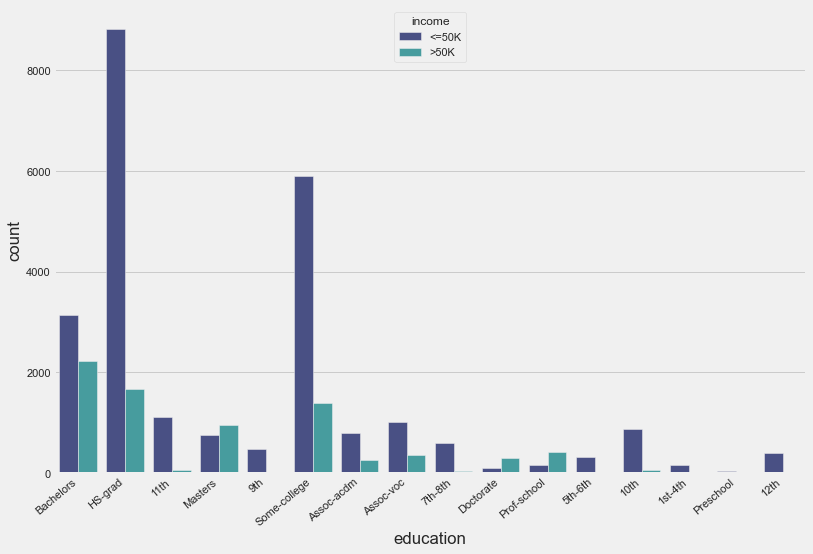

In [23]:
plt.figure(figsize=[12,8])
ax = sns.countplot(df['education'], data=df, hue='income' , palette='mako')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

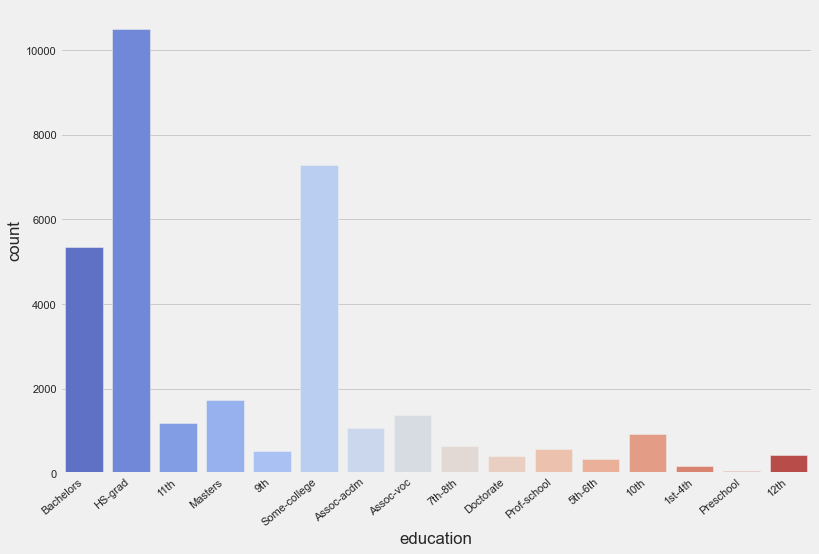

In [24]:
plt.figure(figsize=[12,8])
ax = sns.countplot(df['education'], data=df , palette='coolwarm')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

          1.There are 16 unique educations..
          2.Most people have education upto HS-grad and few of them have
          education Preschool is min..
          3.most people have studied Bachelors, HS-grad, Some-college..
          4.Most people earn less <=50K and few earn >50K..
          5.Most People with HS-grad earn <=50K..
          6.Masters holders have high probability to earn >50K..

In [25]:
df['education_num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education_num, dtype: int64

In [26]:
len(df['education_num'].unique())

16

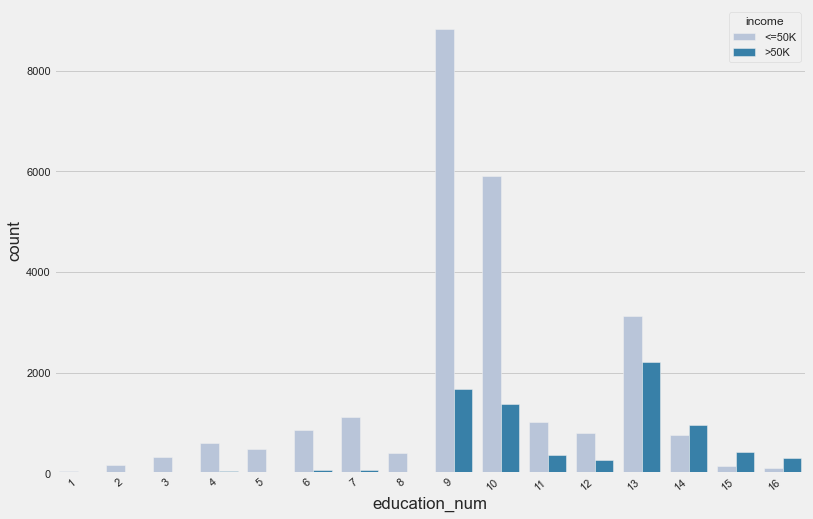

In [27]:
plt.figure(figsize=[12,8])
ax = sns.countplot(df['education_num'], data=df, hue='income' , palette='PuBu')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

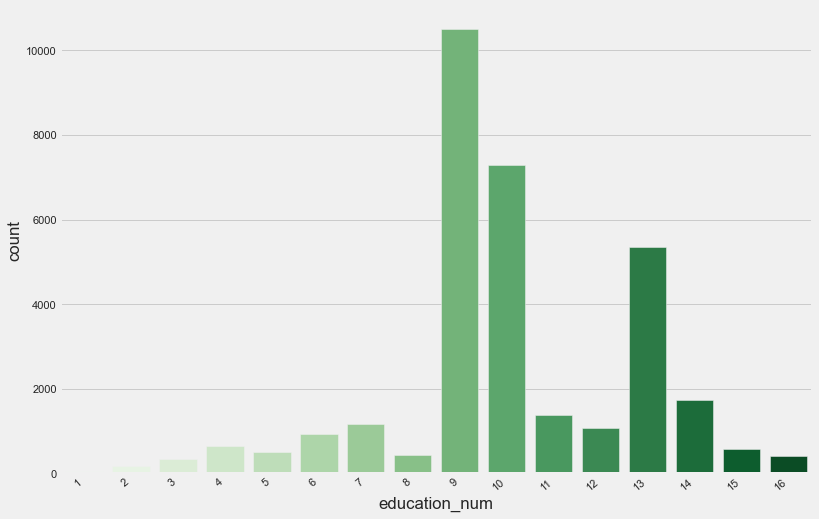

In [28]:
plt.figure(figsize=[12,8])
ax = sns.countplot(df['education_num'], data=df, palette='Greens')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

In [29]:
df['marital_status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64

In [30]:
len(df['marital_status'].unique())

7

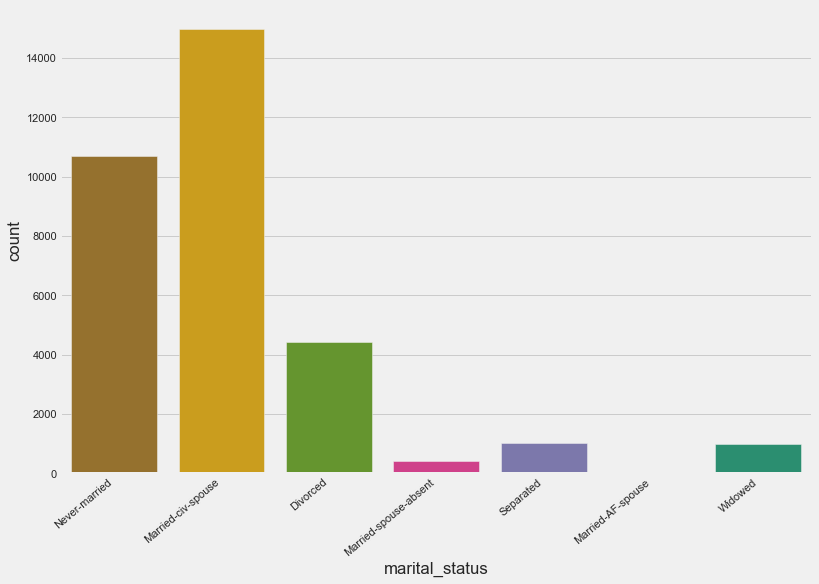

In [31]:
plt.figure(figsize=[12,8])
ax = sns.countplot(df['marital_status'], data=df , palette='Dark2_r')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

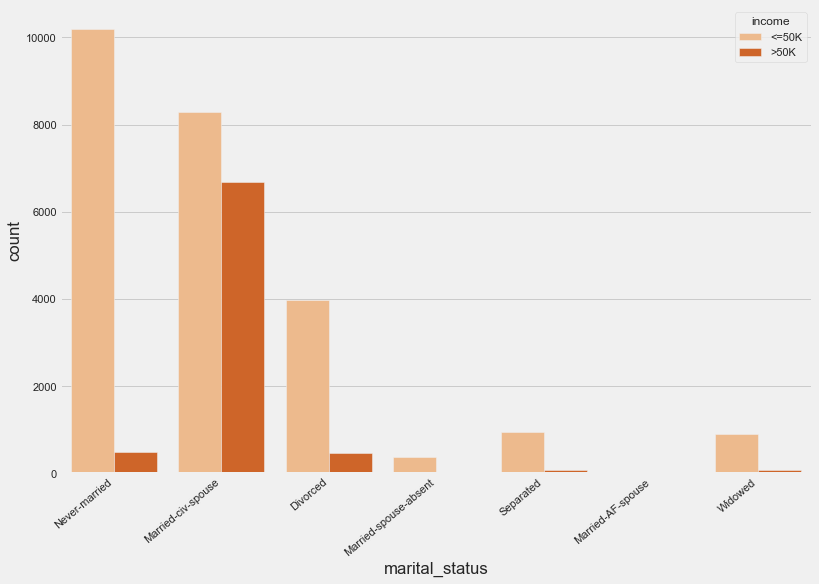

In [32]:
plt.figure(figsize=[12,8])
ax = sns.countplot(df['marital_status'], data=df, hue='income' , palette='Oranges')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

           1.There are 7 unique marital_status..
           2.Most People are Married-civ-spouse and very few are Married-AF-spouse..
           3.People who never-married most of them have income<=50, very few of them earn >50k          

In [33]:
#classes count
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [34]:
#replace '?' with np.nan
df['occupation'].replace('?', np.NAN, inplace=True)

In [35]:
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [36]:
len(df['occupation'].value_counts())

14

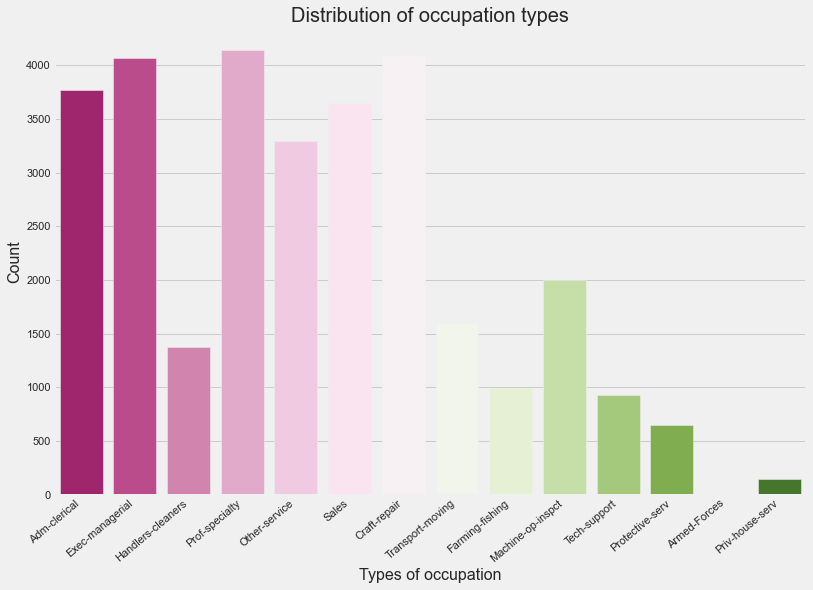

In [37]:
plt.figure(figsize=[12,8])
ax = sns.countplot(df['occupation'], data=df , palette='PiYG')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
ax.set_xlabel(xlabel = 'Types of occupation', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)

plt.title("Distribution of occupation types",  fontsize=20)
plt.show()

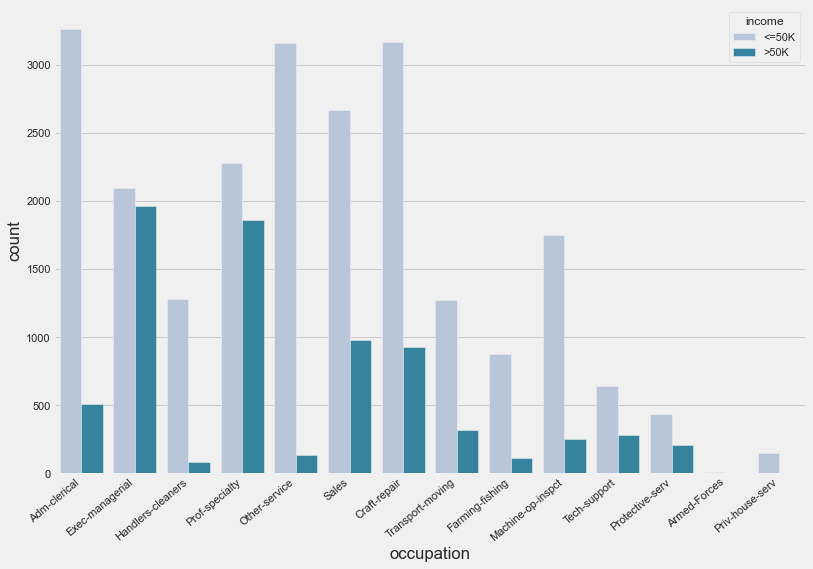

In [38]:
plt.figure(figsize=[12,8])
ax = sns.countplot(df['occupation'], data=df, hue='income' , palette='PuBuGn')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

            1.There are 14 types of different occupation..
            2.Most People have occupation as a Prof-specialty and very few people have occupation as Armed-Forces..
            3.Most people who have occupation such as Adm-clerical , Other-service, Craft-repair are earning <=50K..

In [39]:
df['relationship'].value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [40]:
df['relationship'].unique()

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

In [41]:
len(df['relationship'].unique())

6

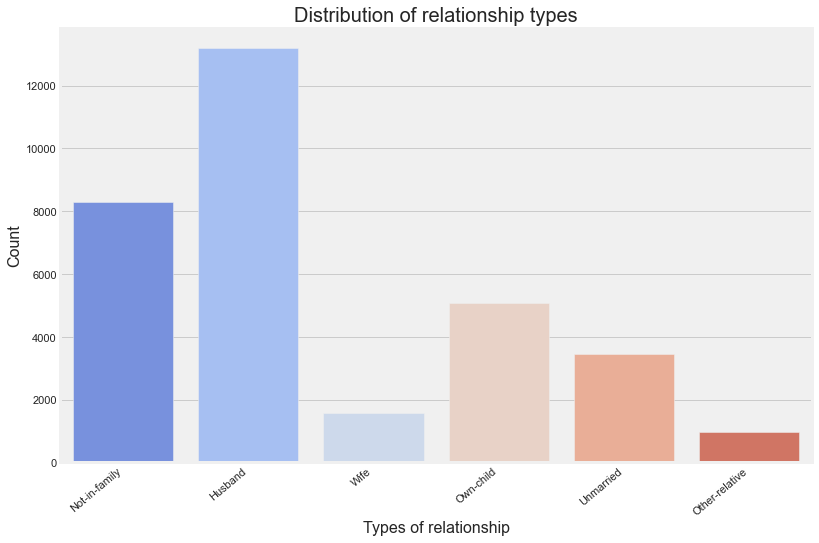

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=[12,8])
ax = sns.countplot(df['relationship'], data=df , palette='coolwarm')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
ax.set_xlabel(xlabel = 'Types of relationship', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)

plt.title("Distribution of relationship types",  fontsize=20)
plt.show()

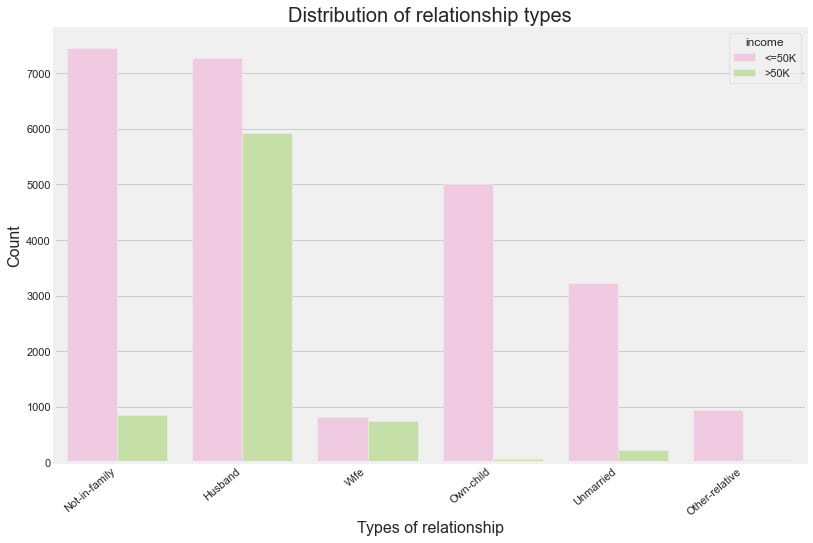

In [43]:
plt.figure(figsize=[12,8])
ax = sns.countplot(df['relationship'], data=df ,hue='income', palette='PiYG')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
ax.set_xlabel(xlabel = 'Types of relationship', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)

plt.title("Distribution of relationship types",  fontsize=20)
plt.show()

                1.Most people are have a replationship as a Husband very few people have other-relative..
                2.There are 6 types of unique relationship's..
                3.Most people who are Not-in-family earn <=50K..

In [44]:
df['race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [45]:
len(df['race'].unique())

5

[Text(0, 0, 'White'),
 Text(1, 0, 'Black'),
 Text(2, 0, 'Asian-Pac-Islander'),
 Text(3, 0, 'Amer-Indian-Eskimo'),
 Text(4, 0, 'Other')]

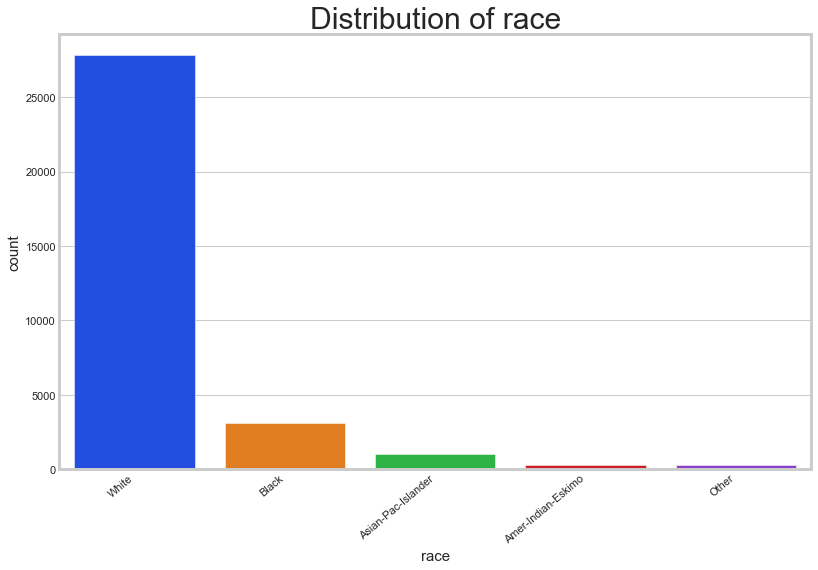

In [46]:
sns.set_style("whitegrid")
plt.figure(figsize=[12,8])
ax = sns.countplot(df['race'], palette = 'bright')
plt.title('Distribution of race', fontsize = 30)
plt.xlabel('race', fontsize = 15)
plt.ylabel('count', fontsize = 15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')

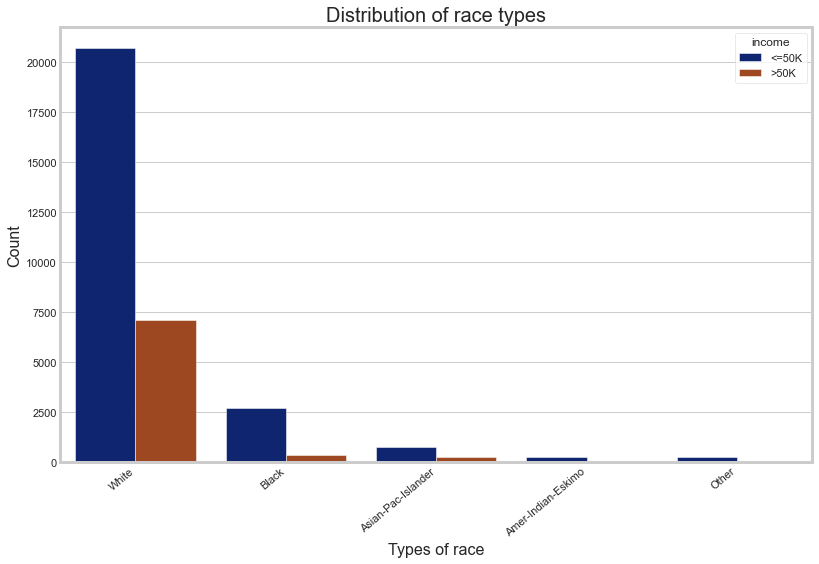

In [47]:

plt.figure(figsize=[12,8])
ax = sns.countplot(df['race'], data=df ,hue='income', palette='dark')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
ax.set_xlabel(xlabel = 'Types of race', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)

plt.title("Distribution of race types",  fontsize=20)
plt.show()

                1.Most People belong white race very few are from other race..
                2.There are 5 types of race..
                3.White race earns <=50k and they also earn >50K compared to other races..

In [48]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [49]:
df['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

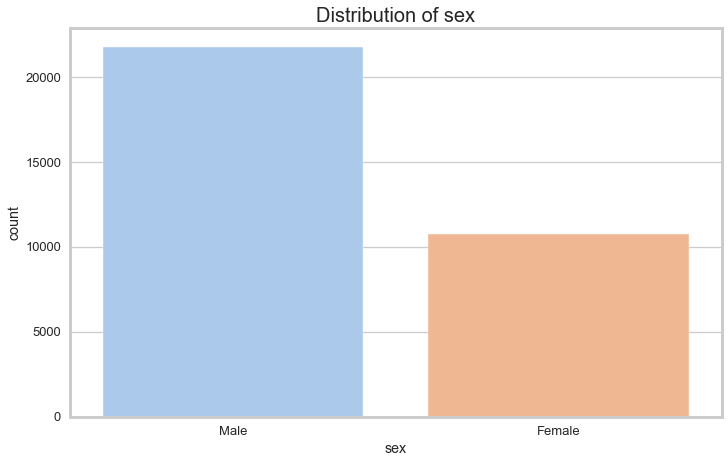

In [50]:
plt.rcParams['figure.figsize'] = (15, 7)
plt.style.use('seaborn-talk')
sns.countplot(df['sex'], palette = 'pastel')
plt.title('Distribution of sex', fontsize = 20)
plt.show()

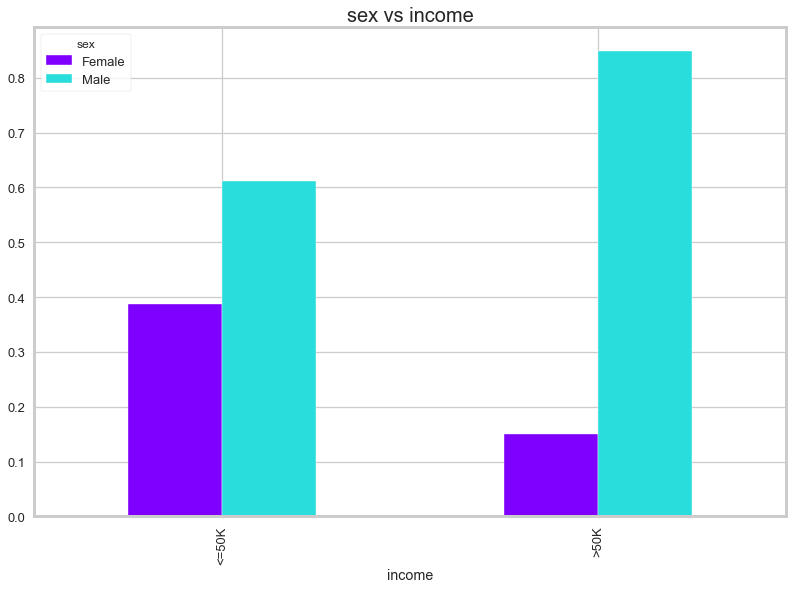

In [51]:
  
plt.rcParams['figure.figsize'] = (12, 9)
dat = pd.crosstab(df['income'], df['sex']) 
dat.div(dat.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                 stacked = False, 
                                                 color = plt.cm.rainbow(np.linspace(0, 1, 4)))
plt.title('sex vs income', fontsize = 20, fontweight = 30)
plt.show()

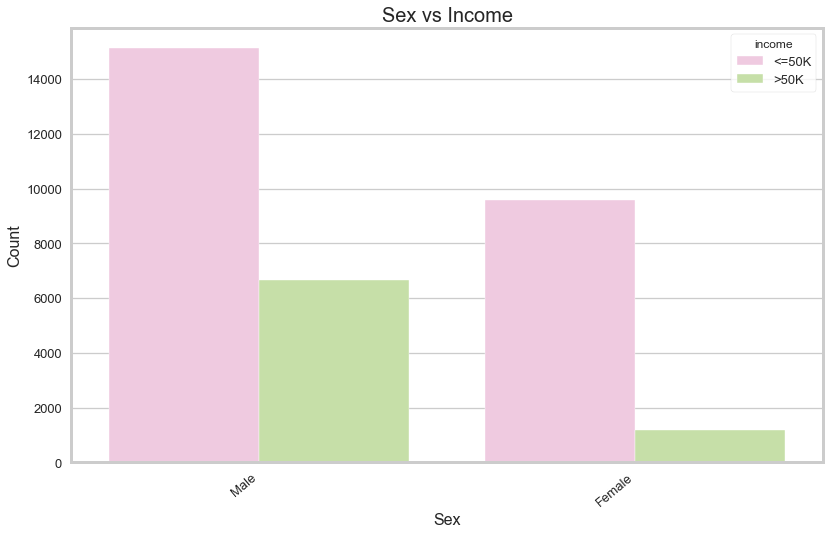

In [52]:
plt.figure(figsize=[12,8])
ax = sns.countplot(df['sex'], data=df ,hue='income', palette='PiYG')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
ax.set_xlabel(xlabel = 'Sex', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)

plt.title("Sex vs Income",  fontsize=20)
plt.show()

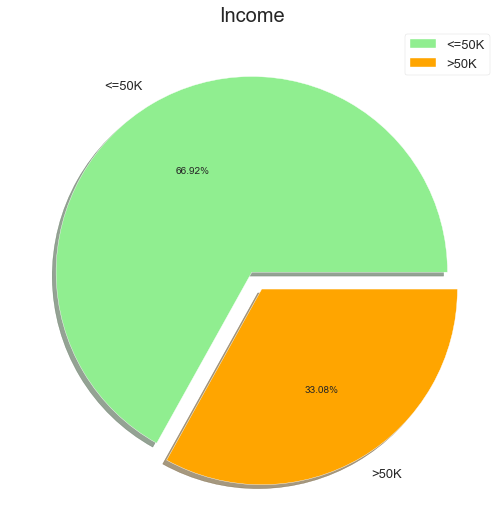

In [53]:
labels = ['<=50K', '>50K']
size = df['sex'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Income', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

                1.Sex is not distributed properly one class is dominant and other is not..
                2.Workers who are Male earn <=50K and Female >50K..
                3.Very few Female earn >50K..
                4.Male are more as compared to Female workers..

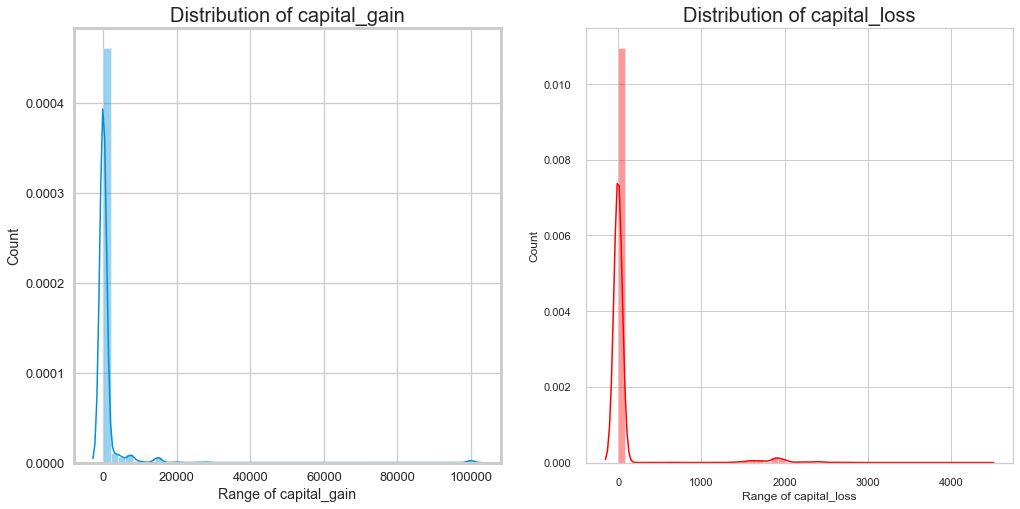

In [54]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (15, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(df['capital_gain'])
plt.title('Distribution of capital_gain', fontsize = 20)
plt.xlabel('Range of capital_gain')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(df['capital_loss'], color = 'red')
plt.title('Distribution of capital_loss', fontsize = 20)
plt.xlabel('Range of capital_loss')
plt.ylabel('Count')
plt.show()

<AxesSubplot:xlabel='capital_gain', ylabel='Density'>

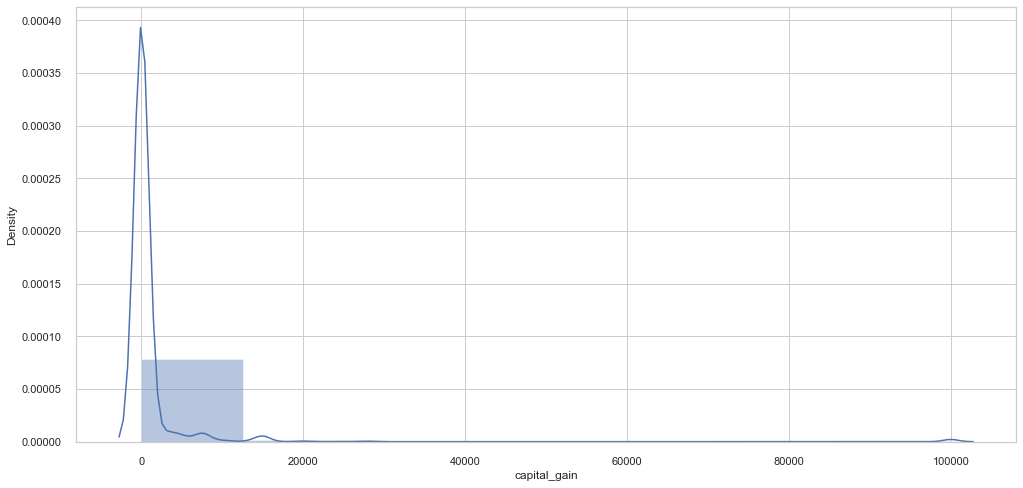

In [55]:
sns.distplot(df['capital_gain'], bins=8)

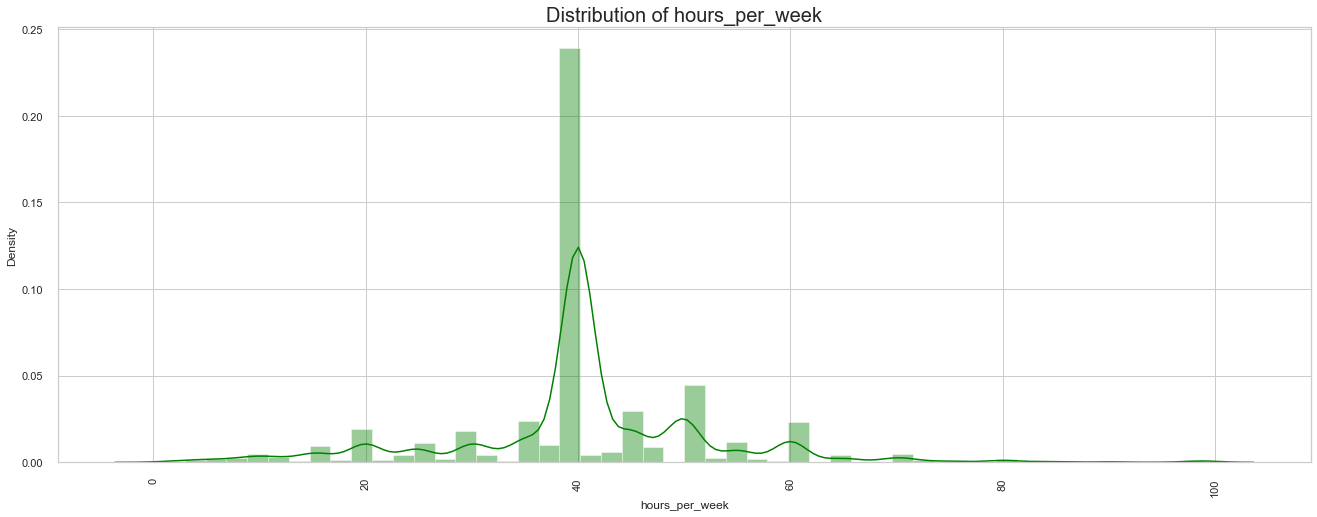

In [56]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.distplot(df['hours_per_week'], color='green')
plt.title('Distribution of hours_per_week', fontsize = 20)
plt.xticks(rotation=90)
plt.show()

In [57]:
len(df['native_country'])

32561

In [58]:
df['native_country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

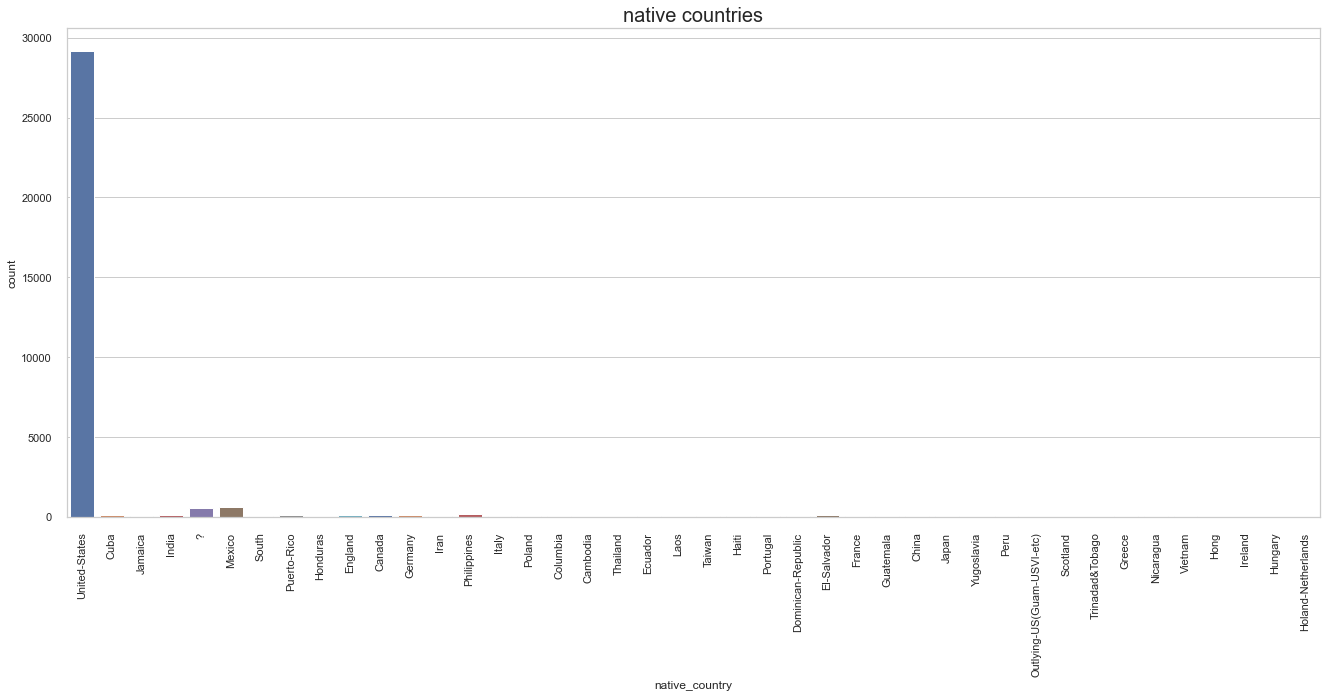

In [59]:

plt.rcParams['figure.figsize'] = (20, 9)
sns.countplot(df['native_country'] ,palette='deep')
plt.title('native countries', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

            1.Most People are from United States..

<Figure size 864x576 with 0 Axes>

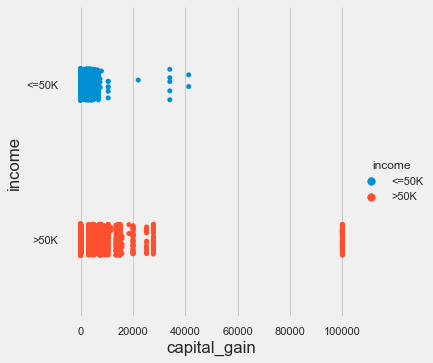

In [60]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 8))
sns.catplot(x='capital_gain',y='income', hue='income' ,data=df)

In [61]:
df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

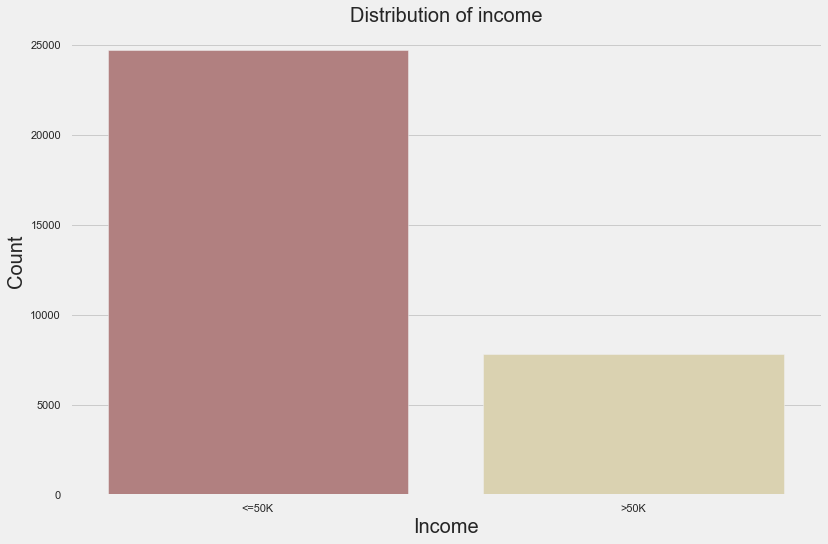

In [62]:

plt.figure(figsize=(12,8))
sns.countplot(df['income'], palette='pink') 
plt.title("Distribution of income", fontsize=20)
plt.xlabel("Income",  fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.show()

                  1.There are more people who earn <=50k..
                  2.Very few people have income >50K..
                  3.The target variable is not properly distributed 1 class have more points then the other class have or we can say class is imbalanced..
                  4.24720 is the number of people who have  income <=50K and 7841 people have income >50K  

<Figure size 864x576 with 0 Axes>

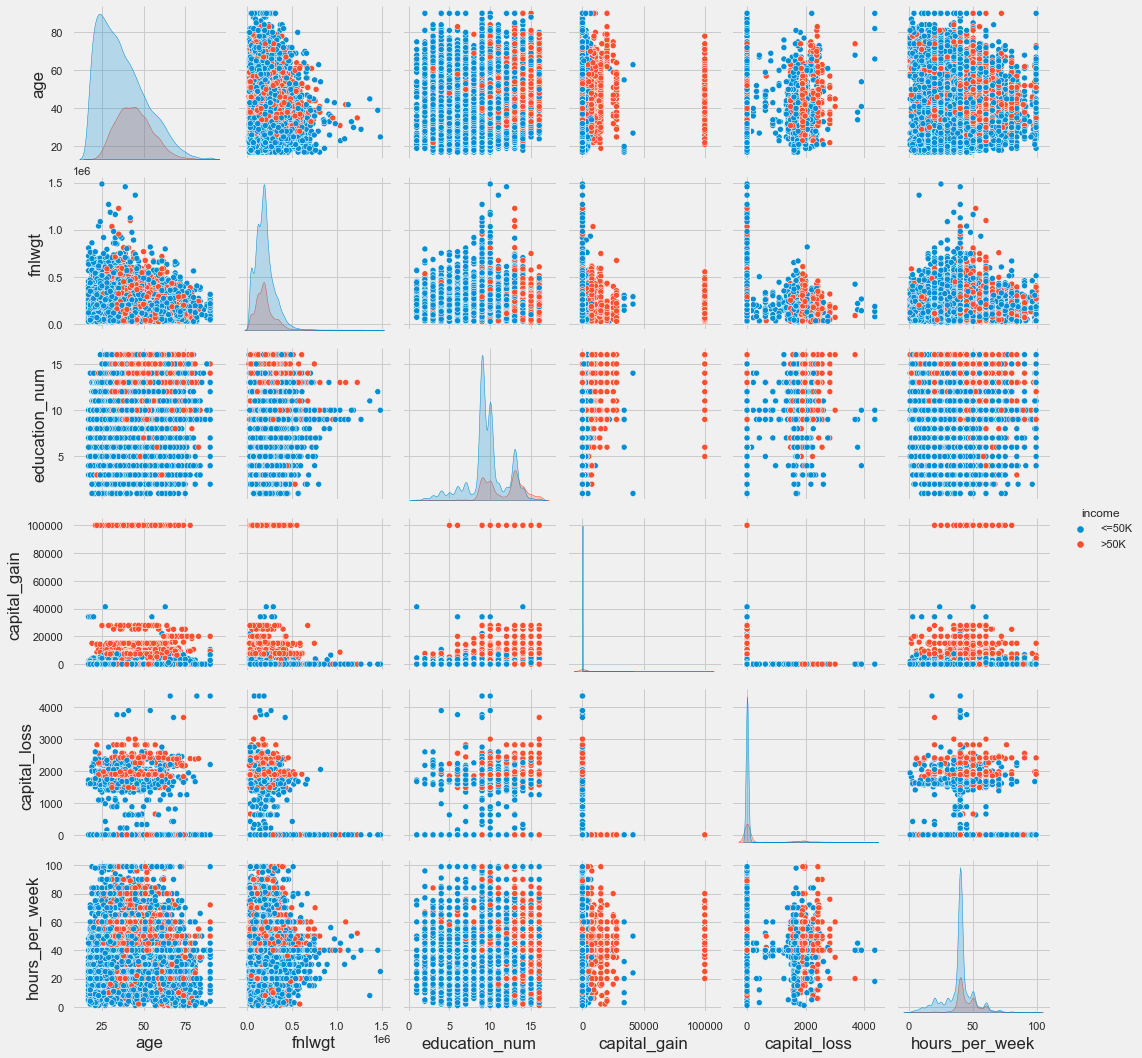

In [63]:
plt.figure(figsize=(12, 8))
plt.style.use('fivethirtyeight')
sns.pairplot(df, hue='income' )

<AxesSubplot:>

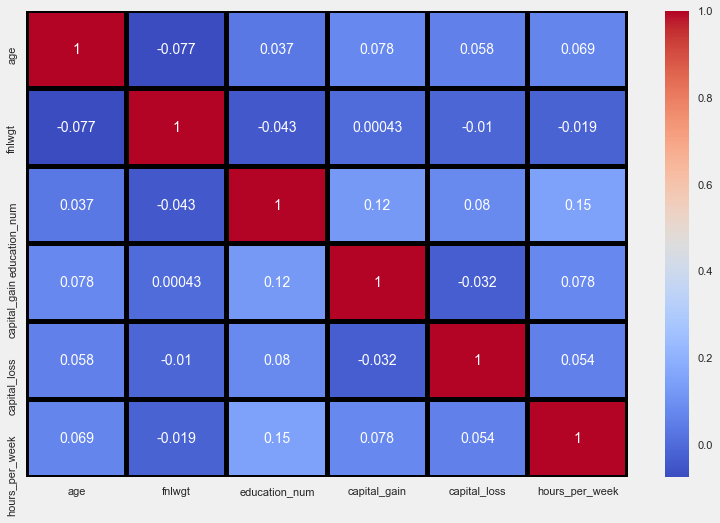

In [64]:
#correlation between the features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linecolor='black', 
           linewidth=4)

### Types of variables


In this section,We will work on categorical and numerical variables. There are a mixture of categorical and numerical variables in the dataset. Categorical variables have data type object. Numerical variables have data type int64.

In [65]:
#all categorical variables
categorical = [i for i in df.columns if df[i].dtype=='O']

categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [66]:
#There are 9 categorical features in our dataset
len(categorical)

9

In [67]:
#categorical data
df[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [68]:
#the working class
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', nan, 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [69]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [70]:
#count of different occupations
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [71]:
#unique native countries
df.native_country.unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [72]:
#we will replace '?' with np.nan
df['native_country'].replace('?' , np.NaN, inplace=True)

In [73]:
#missing values in [workclass , occupation, native_country]
df[categorical].isnull().sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

### Summary of categorical variables


- There are 9 categorical variables. 


- The categorical variables are given by `workclass`, `education`, `marital_status`, `occupation`, `relationship`, `race`, `sex`, `native_country` and `income`.


- `income` is the target variable.

### Frequency counts of categorical variables


Now, I will check the frequency counts of categorical variables

In [74]:
# view frequency counts of values in categorical variables

for var in categorical: 
    
    print("\n", df[var].value_counts())


 Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

 HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

 Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64

 Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales           

In [75]:
# view frequency distribution of categorical variables

for var in categorical: 
    
    print("\n", df[var].value_counts()/np.float(len(df)))


 Private             0.697030
Self-emp-not-inc    0.078038
Local-gov           0.064279
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: workclass, dtype: float64

 HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
10th            0.028654
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013298
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: education, dtype: float64

 Married-civ-spouse       0.459937
Never-married            0.328092
Divorced                 0.136452
Separated                0.031479
Widowed                  0.030497
Married-spouse-absent    0.012837
Married-AF-spouse        0.000706
Name: marital_status, dtype: float64

 Prof-specialty       

### Number of labels: cardinality


The number of labels within a categorical variable is known as **cardinality**. A high number of labels within a variable is known as **high cardinality**. High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

In [76]:
for var in categorical:
    print(var, 'contains' , len(df[var].unique()), 'labels')

workclass contains 9 labels
education contains 16 labels
marital_status contains 7 labels
occupation contains 15 labels
relationship contains 6 labels
race contains 5 labels
sex contains 2 labels
native_country contains 42 labels
income contains 2 labels


We can see that `native_country` column contains relatively large number of labels as compared to other columns. I will check for cardinality after train-test split.

### Explore Numerical Variables

In [77]:
#all numerical variables
numerical  = [i for i in df.columns if df[i].dtype!='O']

In [78]:
numerical

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [79]:
df[numerical].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


### Missing values in numerical variables

In [80]:
#no missing values in numerical data
df[numerical].isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

### Summary of numerical variables


- There are 6 numerical variables. 


- These are given by `age`, `fnlwgt`, `education_num`, `capital_gain`, `capital_loss` and `hours_per_week`.


- All of the numerical variables are of discrete data type.

# **8. Declare feature vector and target variable** <a class="anchor" id="8"></a>

[Table of Contents](#0.1)

In [81]:
#dividing the data into dependent and independent 
#drop income from x 
x = df.drop(['income'], axis=1)

#only save income or target variable values
y =df['income'] 

# **9. Split data into separate training and test set** <a class="anchor" id="9"></a>

[Table of Contents](#0.1)

In [82]:
#now we split the data into train and test
from sklearn.model_selection import train_test_split
x_train , x_test, y_train , y_test = train_test_split(x, y, 
                                    random_state=0, test_size=0.3)

In [83]:
# getting the shapes
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (22792, 14)
Shape of x_test : (9769, 14)
Shape of y_train : (22792,)
Shape of y_test : (9769,)


# **10. Feature Engineering** <a class="anchor" id="10"></a>

[Table of Contents](#0.1)


**Feature Engineering** is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.


First, I will display the categorical and numerical variables again separately.

In [84]:
#dtypes of x_train features
x_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
dtype: object

In [85]:
#all categorical features present in x_train
categorical = [col for col in x_train.columns if x_train[col].dtypes=='O']
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [86]:
#all numeric features present in x_train
numerical = [col for col in x_train.columns if x_train[col].dtypes != 'O']

numerical

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

### Engineering missing values in categorical variables

In [87]:
# print percentage of missing values in the categorical variables in training set
x_train[categorical].isnull().mean()

workclass         0.055985
education         0.000000
marital_status    0.000000
occupation        0.056072
relationship      0.000000
race              0.000000
sex               0.000000
native_country    0.018164
dtype: float64

In [88]:
# print categorical variables with missing data
for col in categorical:
    if x_train[col].isnull().mean()>0:
        print(col, (x_train[col].isnull().mean()))

workclass 0.055984555984555984
occupation 0.05607230607230607
native_country 0.018164268164268166


In [89]:
#these 3 feature are missing values so we fill them
print(df['workclass'].mode()[0])
print(df['occupation'].mode()[0])
print(df['native_country'].mode()[0])

Private
Prof-specialty
United-States


In [90]:
#impute missing categorical variables with most frequent value
for df2 in [x_train, x_test]:
    df2['workclass'].fillna(x_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(x_train['occupation'].mode()[0], inplace=True)
    df2['native_country'].fillna(x_train['native_country'].mode()[0], inplace=True)    

In [91]:
x_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country'],
      dtype='object')

In [92]:
x_test.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country'],
      dtype='object')

In [93]:
x_train[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [94]:
x_test[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [95]:
x_test

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
22278,27,Private,177119,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,44,United-States
8950,27,Private,216481,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States
7838,25,Private,256263,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States
16505,46,Private,147640,5th-6th,3,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,1902,40,United-States
19140,45,Private,172822,11th,7,Divorced,Transport-moving,Not-in-family,White,Male,0,2824,76,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21949,46,Private,192963,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,Asian-Pac-Islander,Male,0,2415,35,Philippines
26405,64,Federal-gov,388594,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,45,United-States
23236,54,Self-emp-inc,304570,Bachelors,13,Married-civ-spouse,Machine-op-inspct,Husband,Asian-Pac-Islander,Male,7688,0,40,United-States
26823,36,Self-emp-not-inc,90159,Some-college,10,Married-civ-spouse,Other-service,Wife,White,Female,0,0,40,United-States


In [96]:
y_test

22278    <=50K
8950     <=50K
7838     <=50K
16505    <=50K
19140     >50K
         ...  
21949     >50K
26405     >50K
23236     >50K
26823    <=50K
20721    <=50K
Name: income, Length: 9769, dtype: object

In [97]:
y_train

32098     >50K
25206    <=50K
23491     >50K
12367    <=50K
7054     <=50K
         ...  
13123     >50K
19648    <=50K
9845     <=50K
10799     >50K
2732     <=50K
Name: income, Length: 22792, dtype: object

In [98]:
x_train

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
32098,45,Private,170871,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7298,0,60,United-States
25206,47,State-gov,108890,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,1831,0,38,United-States
23491,48,Private,187505,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States
12367,29,Private,145592,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Guatemala
7054,23,Private,203003,7th-8th,4,Never-married,Craft-repair,Not-in-family,White,Male,0,0,25,Germany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,43,Local-gov,33331,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States
19648,44,Private,98466,10th,6,Never-married,Farming-fishing,Unmarried,White,Male,0,0,35,United-States
9845,23,Private,45317,Some-college,10,Separated,Sales,Own-child,White,Female,0,0,40,United-States
10799,45,Local-gov,215862,Doctorate,16,Married-civ-spouse,Exec-managerial,Husband,White,Male,7688,0,45,United-States


In [99]:
x_train[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
32098,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
25206,State-gov,HS-grad,Divorced,Adm-clerical,Unmarried,White,Female,United-States
23491,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,United-States
12367,Private,HS-grad,Never-married,Craft-repair,Not-in-family,White,Male,Guatemala
7054,Private,7th-8th,Never-married,Craft-repair,Not-in-family,White,Male,Germany


In [100]:
x_train[categorical].columns

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country'],
      dtype='object')

In [101]:
import category_encoders as ce
encoder = ce.OneHotEncoder(cols = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 
                                 'race', 'sex', 'native_country'])

x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test) 

In [102]:
x_train

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
32098,45,1,0,0,0,0,0,0,0,170871,...,0,0,0,0,0,0,0,0,0,0
25206,47,0,1,0,0,0,0,0,0,108890,...,0,0,0,0,0,0,0,0,0,0
23491,48,1,0,0,0,0,0,0,0,187505,...,0,0,0,0,0,0,0,0,0,0
12367,29,1,0,0,0,0,0,0,0,145592,...,0,0,0,0,0,0,0,0,0,0
7054,23,1,0,0,0,0,0,0,0,203003,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,43,0,0,0,0,0,1,0,0,33331,...,0,0,0,0,0,0,0,0,0,0
19648,44,1,0,0,0,0,0,0,0,98466,...,0,0,0,0,0,0,0,0,0,0
9845,23,1,0,0,0,0,0,0,0,45317,...,0,0,0,0,0,0,0,0,0,0
10799,45,0,0,0,0,0,1,0,0,215862,...,0,0,0,0,0,0,0,0,0,0


# Feature Scaling 

In [103]:
cols = x_train.columns

In [104]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [105]:
x_train = pd.DataFrame(x_train , columns=[cols])
x_test = pd.DataFrame(x_test, columns =[cols])

In [106]:
x_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
0,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.058906,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.50,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.578076,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.080425,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.270650,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.210240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model training

In [107]:
#train a gaussian naive bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB

#instantiate the model
gnb = GaussianNB()

In [108]:
#fit the model
gnb.fit(x_train , y_train)

GaussianNB()

In [109]:
y_train[:4]

32098     >50K
25206    <=50K
23491     >50K
12367    <=50K
Name: income, dtype: object

# Predict the result

In [110]:
y_pred = gnb.predict(x_test)
y_pred

array(['<=50K', '<=50K', '>50K', ..., '>50K', '<=50K', '<=50K'],
      dtype='<U5')

# **14. Check accuracy score** <a class="anchor" id="14"></a>

In [111]:
from sklearn.metrics import accuracy_score
print("model accuracy score: {0:0.4f}".format(accuracy_score(y_test, y_pred)))

model accuracy score: 0.8060


Here, y_test are the true class labels and y_pred are the predicted class labels in the test-set.

# Compare the train-set and test-set accuracy
Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [112]:
acc_gnb = accuracy_score(y_test, y_pred)

In [113]:
y_pred_train = gnb.predict(x_train)

In [114]:
y_pred_train

array(['>50K', '<=50K', '>50K', ..., '<=50K', '>50K', '<=50K'],
      dtype='<U5')

In [115]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8067


### Check for overfitting and underfitting


In [116]:
#print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(x_test, y_test)))

Training set score: 0.8067
Test set score: 0.8060


The training-set accuracy score is 0.8067 while the test-set accuracy to be 0.8083. These two values are quite comparable. So, there is no sign of overfitting. 

### Compare model accuracy with null accuracy


So, the model accuracy is 0.8083. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the **null accuracy**. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set. 

In [117]:
# check class distribution in test set

y_test.value_counts()

<=50K    7407
>50K     2362
Name: income, dtype: int64

We can see that the occurences of most frequent class is 7407. So, we can calculate null accuracy by dividing 7407 by total number of occurences.

In [118]:
# check null accuracy score

null_accuracy = (7407/(7407+2362))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7582


We can see that our model accuracy score is 0.8083 but null accuracy score is 0.7582. So, we can conclude that our Gaussian Naive Bayes Classification model is doing a very good job in predicting the class labels.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.


But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making. 


We have another tool called `Confusion matrix` that comes to our rescue.

# **15. Confusion matrix** <a class="anchor" id="15"></a>

[Table of Contents](#0.1)


A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.


Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-


**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.


**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.


**False Positives (FP)** – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**



**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**



These four outcomes are summarized in a confusion matrix given below.

In [119]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[5978 1429]
 [ 466 1896]]

True Positives(TP) =  5978

True Negatives(TN) =  1896

False Positives(FP) =  1429

False Negatives(FN) =  466


The confusion matrix shows `5999 + 1897 = 7896 correct predictions` and `1408 + 465 = 1873 incorrect predictions`.


In this case, we have


- `True Positives` (Actual Positive:1 and Predict Positive:1) - 5999


- `True Negatives` (Actual Negative:0 and Predict Negative:0) - 1897


- `False Positives` (Actual Negative:0 but Predict Positive:1) - 1408 `(Type I error)`


- `False Negatives` (Actual Positive:1 but Predict Negative:0) - 465 `(Type II error)`

              precision    recall  f1-score   support

       <=50K       0.93      0.81      0.86      7407
        >50K       0.57      0.80      0.67      2362

    accuracy                           0.81      9769
   macro avg       0.75      0.80      0.76      9769
weighted avg       0.84      0.81      0.82      9769



<AxesSubplot:>

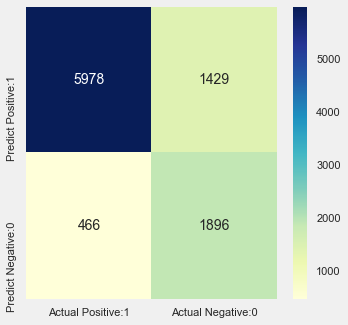

In [120]:
# visualize confusion matrix with seaborn heatmap
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
plt.rcParams['figure.figsize'] = (5, 5)

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# **16. Classification metrices** <a class="anchor" id="16"></a>

[Table of Contents](#0.1)

### Classification Report


**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [121]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.93      0.81      0.86      7407
        >50K       0.57      0.80      0.67      2362

    accuracy                           0.81      9769
   macro avg       0.75      0.80      0.76      9769
weighted avg       0.84      0.81      0.82      9769



# classification accuracy

In [122]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [123]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))


Classification accuracy : 0.8060


# classification error

In [124]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))


Classification error : 0.1940


### Precision


**Precision** can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP). 


So, **Precision** identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.



Mathematically, precision can be defined as the ratio of `TP to (TP + FP)`.


In [125]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))


Precision : 0.8071


### Recall


Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes.
It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). **Recall** is also called **Sensitivity**.


**Recall** identifies the proportion of correctly predicted actual positives.


Mathematically, recall can be given as the ratio of `TP to (TP + FN)`.


In [126]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9277


In [127]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9277


In [128]:
false_positive_rate = FP / float(FP + TN)

print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.4298


In [129]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.5702


In [130]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = gnb.predict_proba(x_test)[0:10]

y_pred_prob

array([[9.99999402e-01, 5.97726033e-07],
       [9.99741558e-01, 2.58442035e-04],
       [1.68415743e-01, 8.31584257e-01],
       [9.36605298e-05, 9.99906339e-01],
       [6.43898109e-09, 9.99999994e-01],
       [8.96765082e-01, 1.03234918e-01],
       [9.99999921e-01, 7.88422887e-08],
       [9.99993401e-01, 6.59867386e-06],
       [9.88525360e-01, 1.14746404e-02],
       [9.99999996e-01, 4.40105565e-09]])

In [131]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - <=50K', 'Prob of - >50K'])

y_pred_prob_df

,Prob of - <=50K,Prob of - >50K
0,9.999994e-01,5.977260e-07
1,9.997416e-01,2.584420e-04
2,1.684157e-01,8.315843e-01
3,9.366053e-05,9.999063e-01
4,6.438981e-09,1.000000e+00
5,8.967651e-01,1.032349e-01
6,9.999999e-01,7.884229e-08
7,9.999934e-01,6.598674e-06
8,9.885254e-01,1.147464e-02
9,1.000000e+00,4.401056e-09


In [132]:
# print the first 10 predicted probabilities for class 1 - Probability of >50K

gnb.predict_proba(x_test)[0:10, 1]

array([5.97726033e-07, 2.58442035e-04, 8.31584257e-01, 9.99906339e-01,
       9.99999994e-01, 1.03234918e-01, 7.88422887e-08, 6.59867386e-06,
       1.14746404e-02, 4.40105565e-09])

In [133]:
# store the predicted probabilities for class 1 - Probability of >50K

y_pred1 = gnb.predict_proba(x_test)[:, 1]

Text(0, 0.5, 'Frequency')

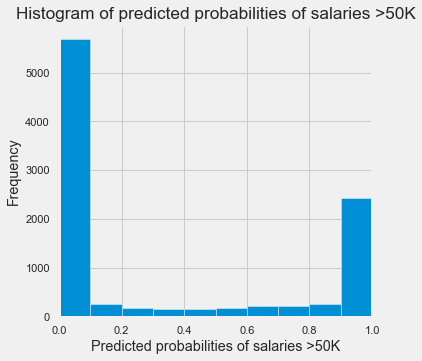

In [134]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of salaries >50K')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')

### Observations


- We can see that the above histogram is highly positive skewed.


- The first column tell us that there are approximately 5700 observations with probability between 0.0 and 0.1 whose salary 
  is <=50K.


- There are relatively small number of observations with probability > 0.5.


- So, these small number of observations predict that the salaries will be >50K.


- Majority of observations predcit that the salaries will be <=50K.

### ROC  AUC

# **18. ROC - AUC** <a class="anchor" id="18"></a>

[Table of Contents](#0.1)



### ROC Curve


Another tool to measure the classification model performance visually is **ROC Curve**. ROC Curve stands for **Receiver Operating Characteristic Curve**. An **ROC Curve** is a plot which shows the perfoarmance of a classification model at various 
classification threshold levels. 



The **ROC Curve** plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** at various threshold levels.



**True Positive Rate (TPR)** is also called **Recall**. It is defined as the ratio of `TP to (TP + FN)`.




**False Positive Rate (FPR)** is defined as the ratio of `FP to (FP + TN)`.



In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP).




**ROC AUC** stands for **Receiver Operating Characteristic - Area Under Curve**. It is a technique to compare classifier performance. In this technique, we measure the `area under the curve (AUC)`. A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5. 


So, **ROC AUC** is the percentage of the ROC plot that is underneath the curve.

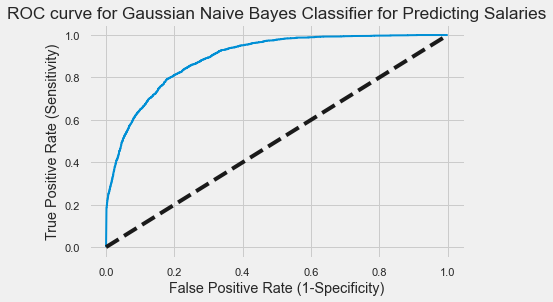

In [135]:
from sklearn.metrics import roc_curve

fpr , tpr, thresholds = roc_curve(y_test, y_pred1, pos_label='>50K')

plt.figure(figsize=(6, 4))

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')
plt.xlabel("False Positive Rate (1-Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.show()

ROC curve help us to choose a threshold level that balances sensitivity and specificity for a particular context.

In [136]:
from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test, y_pred1)
print("ROC AUC :{:.4f}".format(ROC_AUC))

ROC AUC :0.8932


### Interpretation



- ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.

- ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether it will rain tomorrow or not.

In [137]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(gnb, x_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8938


# **19. k-Fold Cross Validation** <a class="anchor" id="19"></a>

[Table of Contents](#0.1)

In [138]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(gnb, x_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8938


In [139]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(gnb, x_train ,y_train, cv=10, scoring='accuracy')
print("Cross-validated score:{}".format(scores))

Cross-validated score:[0.81359649 0.80438596 0.81175954 0.8056165  0.79596314 0.79684072
 0.81044318 0.81175954 0.80210619 0.81044318]


In [140]:
print("Average cross-validation score: {:.4f}".format(scores.mean()))

Average cross-validation score: 0.8063


### Interpretation


- Using the mean cross-validation, we can conclude that we expect the model to be around 80.63% accurate on average.

- If we look at all the 10 scores produced by the 10-fold cross-validation, we can also conclude that there is a relatively small variance in the accuracy between folds, ranging from 81.35% accuracy to 79.64% accuracy. So, we can conclude that the model is independent of the particular folds used for training.

- Our original model accuracy is 0.8083, but the mean cross-validation accuracy is 0.8063. So, the 10-fold cross-validation accuracy does not result in performance improvement for this model.

In [141]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC  , LinearSVC
from sklearn.naive_bayes import GaussianNB

# Random Forest Classifier

In [142]:
random_forest = RandomForestClassifier(n_estimators=100 ,max_depth=5)
random_forest.fit(x_train ,y_train)

RandomForestClassifier(max_depth=5)

In [143]:
y_predict = random_forest.predict(x_test)

In [144]:
y_pred_quant = random_forest.predict_proba(x_test)
y_pred = random_forest.predict(x_test)

In [145]:
acc_random_forest = random_forest.score(x_train , y_train)

In [146]:
# evaluating the model
print("Training Accuracy :", random_forest.score(x_train, y_train))
print("Testing Accuracy :", random_forest.score(x_test, y_test))

Training Accuracy : 0.8392418392418393
Testing Accuracy : 0.8289487153239841


In [147]:
#confusion matrix
#cm = confusion_matrix(y_test, y_pred)
#plt.rcParams['figure.figsize'] = (5, 5)
#sns.heatmap(cm , annot=True, cmap='PuBu')

#classification report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

       <=50K       0.82      0.99      0.90      7407
        >50K       0.88      0.34      0.49      2362

    accuracy                           0.83      9769
   macro avg       0.85      0.66      0.69      9769
weighted avg       0.84      0.83      0.80      9769



In [148]:
acc_random_forest = random_forest.score(x_train, y_train)

In [149]:
acc_random_forest

0.8392418392418393

<AxesSubplot:>

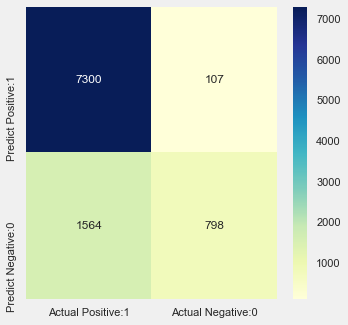

In [150]:

cm = confusion_matrix(y_test, y_pred)
cm_matrix =  pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# logistic Regression

In [151]:
logreg = LogisticRegression()
logreg.fit(x_train , y_train)

LogisticRegression()

In [152]:
y_pred = logreg.predict(x_test)

In [153]:
acc_logistic_regression = logreg.score(x_train , y_train)

In [154]:
acc_logistic_regression

0.8466128466128466

In [155]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.87      0.94      0.90      7407
        >50K       0.74      0.57      0.64      2362

    accuracy                           0.85      9769
   macro avg       0.80      0.75      0.77      9769
weighted avg       0.84      0.85      0.84      9769



<AxesSubplot:>

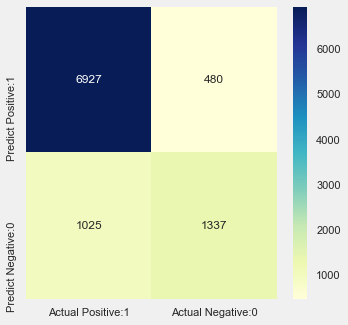

In [156]:

cm = confusion_matrix(y_test, y_pred)
cm_matrix =  pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [157]:
print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[6927  480]
 [1025 1337]]

True Positives(TP) =  6927

True Negatives(TN) =  1337

False Positives(FP) =  480

False Negatives(FN) =  1025


In [158]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [159]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))


Classification accuracy : 0.8459


In [160]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))


Classification error : 0.1541


In [161]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))


Precision : 0.9352


In [162]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8711


In [163]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8711


In [164]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.2642


In [165]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.7358


# K-Nearest Neighbors 

In [166]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
acc_Knn = knn.score(x_train, y_train)

In [167]:
acc_Knn

0.913083538083538

In [168]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.89      0.91      0.90      7407
        >50K       0.69      0.67      0.68      2362

    accuracy                           0.85      9769
   macro avg       0.79      0.79      0.79      9769
weighted avg       0.85      0.85      0.85      9769



In [169]:
cm = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

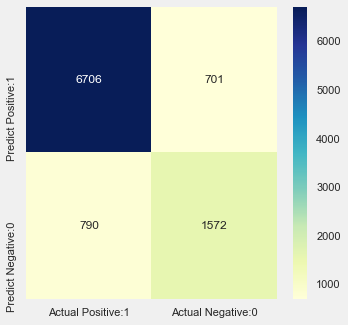

In [170]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [171]:
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train , y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

In [172]:
error_rate

[0.17299621250895691,
 0.15242092332889753,
 0.15262565257447025,
 0.146381410584502,
 0.15006653700481112,
 0.14392465963762924,
 0.14443648275156107,
 0.1419797318046883,
 0.14238919029583377,
 0.14177500255911557,
 0.14157027331354283,
 0.13798751151602007,
 0.1390111577438837,
 0.13778278227044732,
 0.13983007472617465,
 0.13798751151602007,
 0.14126317944518374,
 0.13768041764766098,
 0.1378851468932337,
 0.1367591360425837,
 0.13768041764766098,
 0.13542839594636094,
 0.13737332377930186,
 0.13604258368307912,
 0.1369638652881564,
 0.1387040638755246,
 0.1378851468932337,
 0.13829460538437915,
 0.1394206162350292,
 0.13890879312109736,
 0.1390111577438837,
 0.13921588698945644,
 0.1396253454806019,
 0.13860169925273824,
 0.1396253454806019,
 0.1394206162350292,
 0.139932439348961,
 0.14126317944518374,
 0.139932439348961]

Text(0, 0.5, 'Error Rate')

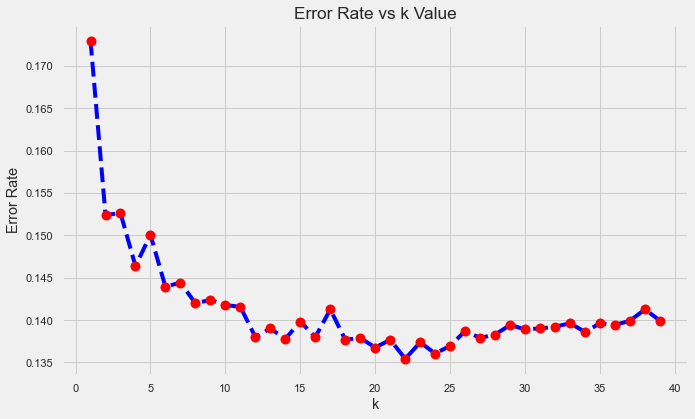

In [173]:
plt.figure(figsize=(10, 6))

plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed',
        marker='o', markerfacecolor='red', markersize=10)

plt.title('Error Rate vs k Value')
plt.xlabel('k')
plt.ylabel('Error Rate')

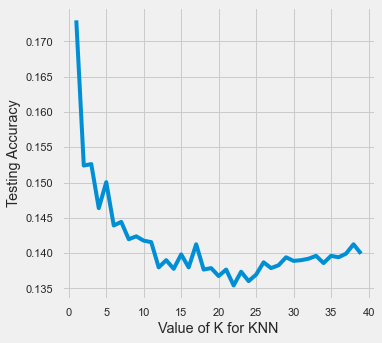

In [174]:
plt.plot(range(1, 40), error_rate)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.grid(True)

In [175]:
knn = KNeighborsClassifier(n_neighbors = 22)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
acc_knn = knn.score(x_train, y_train)
print(acc_knn)
print("\n")
print(confusion_matrix(y_test, y_pred))

0.8739031239031239


[[6924  483]
 [ 840 1522]]


In [176]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      7407
        >50K       0.76      0.64      0.70      2362

    accuracy                           0.86      9769
   macro avg       0.83      0.79      0.80      9769
weighted avg       0.86      0.86      0.86      9769



Text(0, 0.5, 'Error Rate')

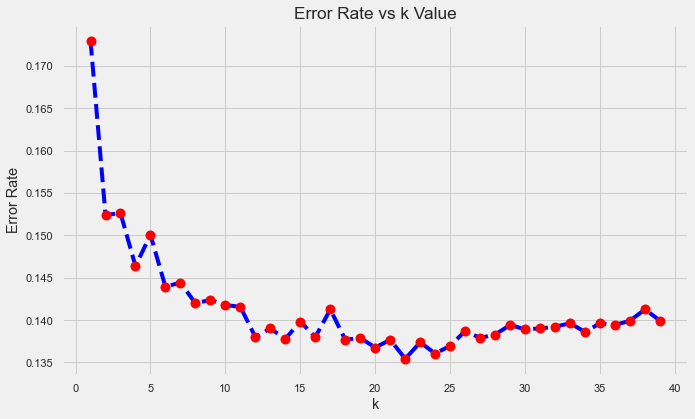

In [177]:
plt.figure(figsize=(10, 6))

plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed',
        marker='o', markerfacecolor='red', markersize=10)

plt.title('Error Rate vs k Value')
plt.xlabel('k')
plt.ylabel('Error Rate')

# Support Vector Classifier

In [178]:
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)

LinearSVC()

In [179]:
y_pred = linear_svc.predict(x_test)

In [180]:
acc_svc = linear_svc.score(x_train, y_train)

In [181]:
acc_svc

0.8396805896805897

In [182]:
print("Accuracy: %s%%" % (100*accuracy_score(y_test, y_pred)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 83.57047804278841%
[[6803  604]
 [1001 1361]]
              precision    recall  f1-score   support

       <=50K       0.87      0.92      0.89      7407
        >50K       0.69      0.58      0.63      2362

    accuracy                           0.84      9769
   macro avg       0.78      0.75      0.76      9769
weighted avg       0.83      0.84      0.83      9769



# DecisionTree Classifier

In [183]:
dt = DecisionTreeClassifier()
dt.fit(x_train ,y_train)

DecisionTreeClassifier()

In [184]:
y_pred = dt.predict(x_test)

In [185]:
acc_decision_tree = dt.score(x_train, y_train)

In [186]:
acc_decision_tree

1.0

In [187]:
print("Accuracy: %s%%" % (100*accuracy_score(y_test, y_pred)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 80.57119459514792%
[[6487  920]
 [ 978 1384]]
              precision    recall  f1-score   support

       <=50K       0.87      0.88      0.87      7407
        >50K       0.60      0.59      0.59      2362

    accuracy                           0.81      9769
   macro avg       0.73      0.73      0.73      9769
weighted avg       0.80      0.81      0.80      9769



In [188]:
#Plotting the accuracy of the used algorithms to find the best fit

results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Decision Tree'],
    'Score': [acc_svc, acc_Knn, acc_logistic_regression, acc_random_forest, acc_gnb, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(7)

,Model
Score,
1.000000,Decision Tree
0.913084,KNN
0.846613,Logistic Regression
0.839681,Support Vector Machines
0.839242,Random Forest
0.806019,Naive Bayes


# https://www.kaggle.com/uciml/adult-census-income